In [1]:
from tsp.core.tsp import TSP
from tsp.core.solvers import pyramid_solve
from tsp.core.save import load_list, load_tsp
from tsp.core.viz import visualize_tsp_plt
from tsp.experiment.batch_solver import solve_batch
from tsp.experiment.batch import load_problem_batch, load_list_batch, save_problem_batch

import numpy.random as random
import numpy as np
import matplotlib.pyplot as plt

### Note: place this code file in the same directory that holds the "tsp" folder (the one with core/experiment) so that the imports above work properly. This is generally good practice.

In [2]:
cities = TSP.generate_random(50, w=500, h=500)
save_problem_batch([cities], 'pyramid_test/problems')

Running the above will make ONE random tsp problem and places it inside a new folder called "pyramid_test" that it creates (or you have created by the same name). What are the 3 parameters defining? 

The tsp problem will be called "001.tsp". Please check that this has happened. Then, to run the pyramid:

In [3]:
def pyramid_solve_2_4(problem_list):
    return pyramid_solve(problem_list, k=2, s=4)
solve_batch('pyramid_test/problems', pyramid_solve_2_4, 'pyramid_test/pyr_solutions')

[array([48,  8, 42, 16, 43, 39, 29, 11, 31,  0, 36, 32, 38, 19, 14, 30, 25,
        12, 37, 18,  2,  3, 26, 23, 33,  7, 20, 13, 27, 21, 41,  1, 28, 47,
        34, 10, 44, 49, 35, 45, 24, 40, 46,  6,  5,  4,  9, 22, 15, 17])]

The above should then use the pyramid model with the defined parameters to solve the problem we generated before, and places the pyramid's tour in the new folder called "pyr_solutions". I encourage you to look at pyramid_solve to get a sense of the model's inner workings. The solution file will be called "001.sol". Please check that this has happened.

### Now, by using what you learned by reading the documentation/libraries as well as the original quickstart/experiment demo notebook files, try to generate a visualization of the pyramid's tour of the problem that we generated. Feel free to send me a picture of it when/if you get it!

### The goal afterwards is to create a video of the pyramid's tours to visualize "how" it is making the tour, something simple to begin with, along the lines of the demos on the lab website (http://bigbird.socsci.uci.edu/research.html). We will continue discussing this and making progress towards it over the next week.

Coords shape: (50, 2)


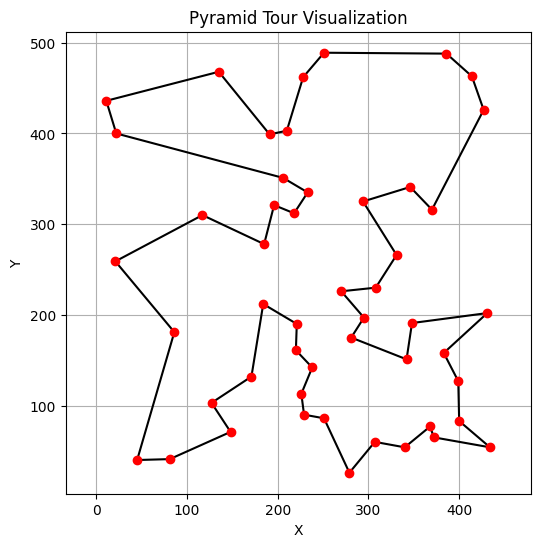

In [4]:
from tsp.core.tsp import TSP
from tsp.core.solvers import pyramid_solve
from tsp.core.save import load_list, load_tsp
from tsp.core.viz import visualize_tsp_plt
from tsp.experiment.batch_solver import solve_batch
from tsp.experiment.batch import load_problem_batch, load_list_batch, save_problem_batch
import numpy.random as random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import json

cities = TSP.generate_random(50, w=500, h=500)
save_problem_batch([cities], 'pyramid_test/problems')

def pyramid_solve_2_4(problem):
    return pyramid_solve(problem, k=3, s=2)
solve_batch('pyramid_test/problems', pyramid_solve_2_4, 'pyramid_test/pyr_solutions')

def load_tsp_coords(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
        return np.array(data["cities"])

coords = load_tsp_coords("pyramid_test/problems/001.tsp")
print("Coords shape:", coords.shape)
tsp_problem = TSP.from_cities(coords, w=500, h =500)

result = pyramid_solve_2_4(tsp_problem)

tour = result.tolist()


import matplotlib.pyplot as plt

tour_coords = coords[tour + [tour[0]]]

plt.figure(figsize=(6, 6))
plt.plot(tour_coords[:, 0], tour_coords[:, 1], 'k-')
plt.plot(coords[:, 0], coords[:, 1], 'ro') 
plt.title("Pyramid Tour Visualization")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.grid(True)
plt.show()




In [22]:
print("Number of cities:", len(tsp_problem.cities))


Number of cities: 50


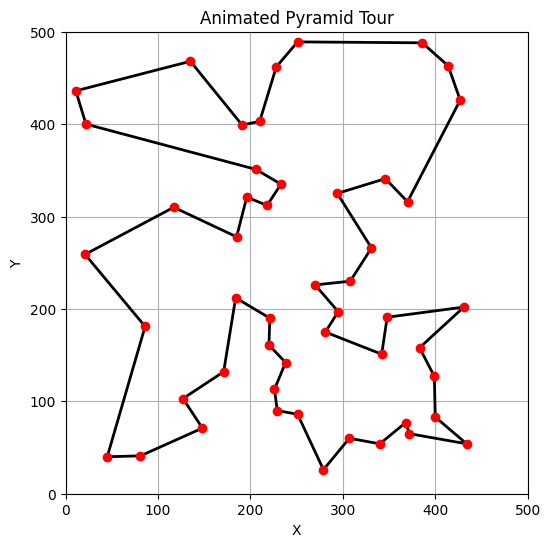

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
plt.rcParams['animation.html'] = 'jshtml'

tour_coords = coords[tour + [tour[0]]]

fig, ax = plt.subplots(figsize=(6, 6))
line, = ax.plot([], [], 'k-', lw=2)
points = ax.plot(coords[:, 0], coords[:, 1], 'ro')[0]

ax.set_xlim(0, 500)
ax.set_ylim(0, 500)
ax.set_title("Animated Pyramid Tour")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(True)
ax.set_aspect('equal')

def init():
    line.set_data([], [])
    return line, points

def update(frame):
    x = tour_coords[:frame+1, 0]
    y = tour_coords[:frame+1, 1]
    line.set_data(x, y)
    return line, points
from IPython.display import HTML

ani = animation.FuncAnimation(
    fig, update, frames=len(tour_coords), init_func=init,
    interval=120, blit=True, repeat=False
)
HTML(ani.to_jshtml())
plt.show()
ani.save("pyramid_tour1.gif", writer="pillow", fps=10)



In [7]:
frames = []
for (centroids, candidates, best_idx, prev_c, next_c) in history:
    frames.append(("candidates", centroids, candidates, best_idx))
    frames.append(("selected",   centroids, candidates, best_idx))

# 3) Set up your figure exactly as before:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(coords[:,0], coords[:,1], 'ro')       # city dots
grey_lines = [ax.plot([], [], alpha=0.3, color='gray')[0]
              for _ in range(max(len(c) for _,c,_,_,_ in history))]
best_line  = ax.plot([], [], 'k-', lw=2)[0]

ax.set_xlim(0,500)
ax.set_ylim(0,500)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Cheapest‐Insertion Steps")

def init():
    for ln in grey_lines:
        ln.set_data([],[])
    best_line.set_data([],[])
    return grey_lines + [best_line]

def update(i):
    mode, centroids, candidates, best_idx = frames[i]
    # clear
    for ln in grey_lines: ln.set_data([],[])
    best_line.set_data([],[])

    if mode == "candidates":
        # draw all variants
        for idx, (perm, cost) in enumerate(candidates):
            tour = list(perm)
            # if you have fixed endpoints, insert prev_c/next_c here
            cycle = tour + [tour[0]]
            xs = centroids[cycle,0]
            ys = centroids[cycle,1]
            grey_lines[idx].set_data(xs, ys)
    else:
        # draw only the chosen tour
        perm, cost = candidates[best_idx]
        tour = list(perm)
        cycle = tour + [tour[0]]
        xs = centroids[cycle,0]
        ys = centroids[cycle,1]
        best_line.set_data(xs, ys)

    return grey_lines + [best_line]

ani = animation.FuncAnimation(
    fig, update, frames=len(frames),
    init_func=init, blit=True, interval=800, repeat=False
)

# Display inline and save
from IPython.display import HTML
HTML(ani.to_jshtml())
ani.save("cheapest_insertion.gif", writer="pillow", fps=5)

NameError: name 'history' is not defined